<a href="https://colab.research.google.com/github/shaunak-dave/Portfolio/blob/main/Parkinson_ACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
print(os.listdir("/content/gdrive/MyDrive/SEM5/Soft Computing/J-Component/spiral"))

['training', 'testing']


In [4]:
directory='/content/gdrive/MyDrive/SEM5/Soft Computing/J-Component/spiral/training'
category=['healthy','parkinson']
spiral_train_data=[]
spiral_train_labels= [] 
for i in category:
  folder=os.path.join(directory,i)
  label=category.index(i)
  for img in os.listdir(folder):
    img_path=os.path.join(folder,img)
    imgarr=cv2.imread(img_path)
    imgarr=cv2.resize(imgarr,(128,128))
    spiral_train_data.append(imgarr)
    spiral_train_labels.append(label)



directory='/content/gdrive/MyDrive/SEM5/Soft Computing/J-Component/spiral/testing'
category=['healthy','parkinson']
spiral_test_data=[]
spiral_test_labels = [] 
for i in category:
  folder=os.path.join(directory,i)
  label=category.index(i)
  for img in os.listdir(folder):
    img_path=os.path.join(folder,img)
    imgarr=cv2.imread(img_path)
    imgarr=cv2.resize(imgarr,(128,128))
    spiral_test_data.append(imgarr)
    spiral_test_labels.append(label)

In [5]:
directory='/content/gdrive/MyDrive/SEM5/Soft Computing/J-Component/wave/training'
category=['healthy','parkinson']
wave_train_data=[]
wave_train_labels = [] 
for i in category:
  folder=os.path.join(directory,i)
  label=category.index(i)
  for img in os.listdir(folder):
    img_path=os.path.join(folder,img)
    imgarr=cv2.imread(img_path)
    imgarr=cv2.resize(imgarr,(128,128))
    wave_train_data.append(imgarr)
    wave_train_labels.append(label)



directory='/content/gdrive/MyDrive/SEM5/Soft Computing/J-Component/wave/testing'
category=['healthy','parkinson']
wave_test_data=[]
wave_test_labels = [] 
for i in category:
  folder=os.path.join(directory,i)
  label=category.index(i)
  for img in os.listdir(folder):
    img_path=os.path.join(folder,img)
    imgarr=cv2.imread(img_path)
    imgarr=cv2.resize(imgarr,(128,128))
    wave_test_data.append(imgarr)
    wave_test_labels.append(label)

In [6]:
spiral_test_data=np.array(spiral_test_data)
spiral_test_labels=np.array(spiral_test_labels)
spiral_train_data=np.array(spiral_train_data)
spiral_train_labels=np.array(spiral_train_labels)

wave_test_data=np.array(wave_test_data)
wave_test_labels=np.array(wave_test_labels)
wave_train_data=np.array(wave_train_data)
wave_train_labels=np.array(wave_train_labels)

In [7]:
spiral_train_data,spiral_test_data=spiral_train_data/255.0,spiral_test_data/255.0

wave_train_data,wave_test_data=wave_train_data/255.0,wave_test_data/255.0

In [8]:
from tensorflow.keras.utils import to_categorical
spiral_train_labels_one_hot = to_categorical(spiral_train_labels)
spiral_test_labels_one_hot = to_categorical(spiral_test_labels)

wave_train_labels_one_hot = to_categorical(wave_train_labels)
wave_test_labels_one_hot = to_categorical(wave_test_labels)

# **Spiral Model**

In [9]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential

spiral_extractor = Sequential([
Conv2D(32, (3,3), activation = 'relu', input_shape = (128,128,3)),
Conv2D(32, (3,3), activation = 'relu'),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64,(3,3), activation = 'relu'),
Conv2D(64, (3,3), activation = 'relu'),
MaxPooling2D(pool_size=(2,2)),
Flatten()
])

In [10]:
# Add dense layers for prediction
x = spiral_extractor.output  
x = Dense(128, activation = 'relu', kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(2, activation = 'softmax')(x)

In [11]:
# Now we combine the feature extractor and CNN for classification
cnn_model = Model(inputs=spiral_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])


In [12]:
history = cnn_model.fit(spiral_train_data, spiral_train_labels_one_hot, epochs=25, validation_data = (spiral_test_data,spiral_test_labels_one_hot))

Epoch 1/25
4/4 [==============================] - 9s 2s/step - loss: 1.0904 - accuracy: 0.4206 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 2/25
4/4 [==============================] - 7s 2s/step - loss: 0.7008 - accuracy: 0.4860 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 3/25
4/4 [==============================] - 7s 2s/step - loss: 0.7093 - accuracy: 0.5234 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 4/25
4/4 [==============================] - 7s 2s/step - loss: 0.6974 - accuracy: 0.5234 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/25
4/4 [==============================] - 7s 2s/step - loss: 0.6927 - accuracy: 0.5234 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 6/25
4/4 [==============================] - 7s 2s/step - loss: 0.6926 - accuracy: 0.5421 - val_loss: 0.6932 - val_accuracy: 0.5333
Epoch 7/25
4/4 [==============================] - 7s 2s/step - loss: 0.6910 - accuracy: 0.5981 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 8/25
4/4 [=========================

In [13]:
prediction_NN = cnn_model.predict(spiral_test_data)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
from sklearn.metrics import accuracy_score,classification_report
ans={}
ans.update({'Model':'Accuracy'})

score=accuracy_score(spiral_test_labels,prediction_NN)
score

ans.update({'CNN':score})
print(classification_report(spiral_test_labels, prediction_NN))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.81      0.87      0.84        15

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



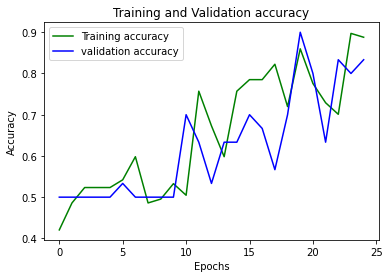

In [15]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,25)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Now we will add Random Forest to classify Spiral Images**

In [16]:
X_rf=spiral_extractor.predict(spiral_train_data)
X_rf.shape

(107, 53824)

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [18]:
RF_model.fit(X_rf,spiral_train_labels)

RandomForestClassifier(n_estimators=50, random_state=42)

In [19]:
xtest_features=spiral_extractor.predict(spiral_test_data)
prediction=RF_model.predict(xtest_features)
prediction

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

In [20]:
score1=accuracy_score(spiral_test_labels,prediction)
score1
ans.update({'CNN+RF':score1})
print(classification_report(spiral_test_labels, prediction))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.75      0.80      0.77        15

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



## **Comparison of both Models**

In [21]:
for i in ans:
  print(i,'\t\t',ans[i])

Model 		 Accuracy
CNN 		 0.8333333333333334
CNN+RF 		 0.7666666666666667


## **Wave Model**

In [22]:
wave_extractor = Sequential([
Conv2D(32, (3,3), activation = 'relu', input_shape = (128,128,3)),
Conv2D(32, (3,3), activation = 'relu'),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64,(3,3), activation = 'relu'),
Conv2D(64, (3,3), activation = 'relu'),
MaxPooling2D(pool_size=(2,2)),
Flatten()
])

In [23]:
x1 = wave_extractor.output  
x1 = Dense(128, activation = 'relu', kernel_initializer = 'he_uniform')(x1)
prediction_layer1 = Dense(2, activation = 'softmax')(x1)

In [24]:
cnn_model1 = Model(inputs=wave_extractor.input, outputs=prediction_layer1)
cnn_model1.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
history1 = cnn_model1.fit(wave_train_data, wave_train_labels_one_hot, epochs=25, validation_data = (wave_test_data,wave_test_labels_one_hot))

Epoch 1/25
4/4 [==============================] - 9s 2s/step - loss: 1.3298 - accuracy: 0.4836 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 2/25
4/4 [==============================] - 8s 2s/step - loss: 0.7585 - accuracy: 0.4836 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/25
4/4 [==============================] - 8s 2s/step - loss: 0.7026 - accuracy: 0.5082 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 4/25
4/4 [==============================] - 8s 2s/step - loss: 0.6979 - accuracy: 0.5164 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 5/25
4/4 [==============================] - 8s 2s/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 6/25
4/4 [==============================] - 8s 2s/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.6000
Epoch 7/25
4/4 [==============================] - 8s 2s/step - loss: 0.6934 - accuracy: 0.5082 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 8/25
4/4 [=========================

In [26]:
prediction_NN1 = cnn_model1.predict(wave_test_data)
prediction_NN1 = np.argmax(prediction_NN1, axis=-1)
prediction_NN1

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
ans1={}
ans1.update({'Model':'Accuracy'})

sc=accuracy_score(wave_test_labels,prediction_NN1)
sc

ans1.update({'CNN':sc})
print(classification_report(wave_test_labels, prediction_NN1))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.80      0.80      0.80        15

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



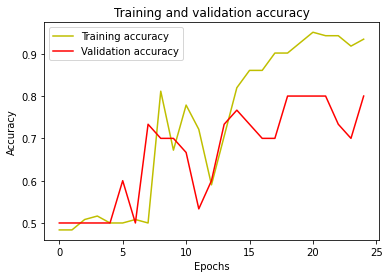

In [28]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
epochs = range(0,25)
plt.plot(epochs, acc1, 'y', label='Training accuracy')
plt.plot(epochs, val_acc1, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
X_rf=wave_extractor.predict(wave_train_data)
X_rf.shape

(122, 53824)

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [31]:
RF_model.fit(X_rf,wave_train_labels)

RandomForestClassifier(n_estimators=50, random_state=42)

In [32]:
xtest_features=wave_extractor.predict(wave_test_data)
prediction=RF_model.predict(xtest_features)
prediction

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
score1=accuracy_score(wave_test_labels,prediction)
score1
ans.update({'CNN+RF':score1})
print(classification_report(wave_test_labels, prediction))

              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.63      0.80      0.71        15

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.66        30
weighted avg       0.68      0.67      0.66        30



## **Comparison Of models**

In [34]:
for i in ans:
  print(i,'\t\t',ans[i])

Model 		 Accuracy
CNN 		 0.8333333333333334
CNN+RF 		 0.6666666666666666
